In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping  # Import EarlyStopping
import keras_tuner as kt
import sqlite3
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

## Data Preparation and Preprocessing

In [3]:
# Connect to DB and import data into a pandas dataframe
connection = sqlite3.connect('../data/db.sqlite')
ratings = pd.read_sql_query("SELECT * FROM ratings", connection)
clean = pd.read_sql_query("SELECT * FROM clean", connection)
dummies = pd.read_sql_query("SELECT * FROM dummies", connection)

connection.close()



## Model Training and Evaluation (Model 1)

In [4]:
# Indicate Model Number 
model = 1

# Indicate which df to use
data_frame = dummies

# Split our preprocessed data into our features and target arrays
X = data_frame.drop(['Binary Rating'], axis=1)
y = data_frame['Binary Rating']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# Hidden layer
nn.add(tf.keras.layers.Dense(units=4,
             input_dim=number_input_features, activation="relu"))

# Hidden layer
nn.add(tf.keras.layers.Dense(
    units=2, activation="relu"))

# Hidden layer
nn.add(tf.keras.layers.Dense(
    units=1, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
EPOCHS = 75
mini_path = f'../models/model{model}/checkpoints/'
checkpoint_filepath = mini_path+'weights.epoch_{epoch:02d}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_freq=5,
    verbose=True)

# Fit the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=EPOCHS, callbacks=[model_checkpoint_callback])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 76        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
Epoch 1/75


2024-03-19 18:51:23.249421: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/183 [..............................] - ETA: 39s - loss: 0.6931 - accuracy: 0.3125
Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5
 27/183 [===>..........................] - ETA: 0s - loss: 0.6916 - accuracy: 0.6319 
Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weigh

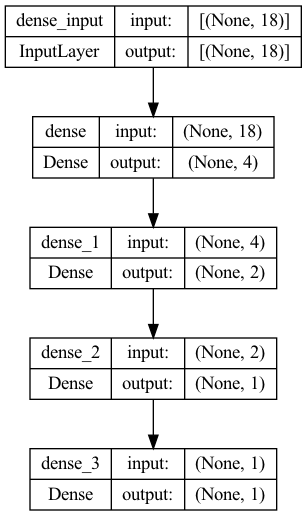

In [5]:
# Save a plot of the model
plot_model(nn, to_file=f'../img/models/deeplearning/model{model}_plot.png', show_shapes=True, show_layer_names=True)


In [6]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Model {model}-- Loss: {model_loss}, Accuracy: {model_accuracy}")


61/61 - 0s - loss: 0.6370 - accuracy: 0.6670 - 89ms/epoch - 1ms/step
Model 1-- Loss: 0.6369718909263611, Accuracy: 0.6670082211494446


In [7]:
# Confusion Matrix
predictions = nn.predict(X_test_scaled)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predictions)
cm


61/61 [==============================] - 0s 331us/step


array([[ 650,    0],
       [1302,    0]])

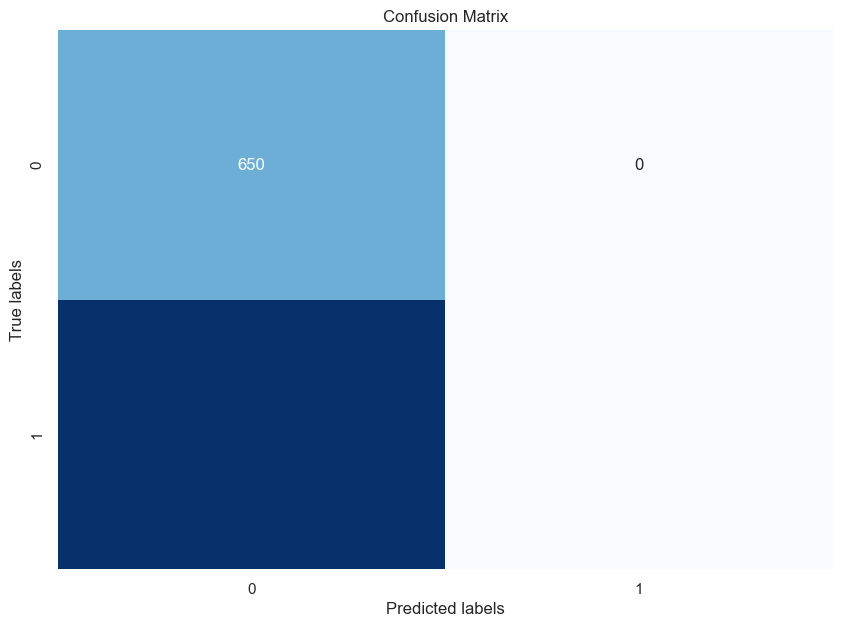

In [8]:
# Optional: Use seaborn for a nicer heatmap
sns.set()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)

# Adding labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save the plot as a PNG file
plt.savefig('confusion_matrix.png')

# Optionally, display the plot
plt.show()

In [ ]:
# Export our model to HDF5 file
nn.save(f'../models/deeplearning/model{model}/model.h5')

## Model Training and Evaluation (Model 2)

In [ ]:
# Indicate Model Number 
model = 2

# Indicate which df to use
data_frame = dummies

# Split our preprocessed data into our features and target arrays
X = data_frame.drop(['Binary Rating'], axis=1)
y = data_frame['Binary Rating']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# Hidden layer
nn.add(tf.keras.layers.Dense(units=4,
             input_dim=number_input_features, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
EPOCHS = 20
mini_path = f'../models/model{model}/checkpoints/'
checkpoint_filepath = mini_path+'weights.epoch_{epoch:02d}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_freq=5,
    verbose=True)

# Fit the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=EPOCHS, callbacks=[model_checkpoint_callback])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 76        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
  1/183 [..............................] - ETA: 27s - loss: 0.7615 - accuracy: 0.5000
Epoch 1: saving model to ../models/model2/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model2/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model2/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model2/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model2/checkpo

In [ ]:
# Save a plot of the model
plot_model(nn, to_file=f'../img/models/deeplearning/model{model}_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Model {model}-- Loss: {model_loss}, Accuracy: {model_accuracy}")

61/61 - 0s - loss: 0.4903 - accuracy: 0.7915 - 69ms/epoch - 1ms/step
Model 2-- Loss: 0.490320086479187, Accuracy: 0.7914959192276001


In [ ]:
# Export our model to HDF5 file
nn.save(f'../models/deeplearning/model{model}/model.h5')

## Model Training and Evaluation (Model 3)

In [ ]:
# Indicate Model Number 
model = 3

# Indicate which df to use
data_frame = dummies

# Split our preprocessed data into our features and target arrays
X = data_frame.drop(['Binary Rating'], axis=1)
y = data_frame['Binary Rating']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# Hidden layer
nn.add(tf.keras.layers.Dense(units=3,
             input_dim=number_input_features, activation="relu"))

# Hidden layer
nn.add(tf.keras.layers.Dense(
    units=3, activation="relu"))

# Hidden layer
nn.add(tf.keras.layers.Dense(
    units=3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
EPOCHS = 75
mini_path = f'../models/model{model}/checkpoints/'
checkpoint_filepath = mini_path+'weights.epoch_{epoch:02d}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_freq=5,
    verbose=True)

# Fit the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=EPOCHS, callbacks=[model_checkpoint_callback])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 3)                 57        
                                                                 
 dense_17 (Dense)            (None, 3)                 12        
                                                                 
 dense_18 (Dense)            (None, 3)                 12        
                                                                 
 dense_19 (Dense)            (None, 1)                 4         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


Epoch 1/75
  1/183 [..............................] - ETA: 32s - loss: 0.6935 - accuracy: 0.4062
Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5
 40/183 [=====>........................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5859 
Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkp

In [ ]:
# Save a plot of the model
plot_model(nn, to_file=f'../img/models/deeplearning/model{model}_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Model {model}-- Loss: {model_loss}, Accuracy: {model_accuracy}")

61/61 - 0s - loss: 0.4397 - accuracy: 0.7976 - 75ms/epoch - 1ms/step
Model 3-- Loss: 0.4396958351135254, Accuracy: 0.7976434230804443


In [ ]:
# Export our model to HDF5 file
nn.save(f'../models/deeplearning/model{model}/model.h5')